# Optimization Method
---
Introduction of optimization methods that improves on gradient descent.

## Weighted Average
---
Firstly, let's learn the idea of weighted average, it smoothes values by given weights to past values.

$$ v_{t} = \beta v_{t-1} + (1 - \beta)\theta_{t}, \space v_{0} = 0, \space \beta \in [0, 1]$$

Where $t$ denotes the current timestamp, $t-1$ the last, and $\theta_{t}$ is the current value. 

If you substitute the equation recurrently, you would get:

$$ v_{t} = (1 - \beta)\theta_{t} + \beta(1 - \beta)\theta_{t-1} + ... + \beta^{n}(1 - \beta)\theta_{t - n} + \beta^{n+1}v_{t-n}$$

You can see that $v$ is a weighted average of past values. If you get confused, let's get into a concrete example by generating some random data points.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [5]:
x = np.linspace(0, 100, 101)
y = np.sin(x) + np.random.rand(101)

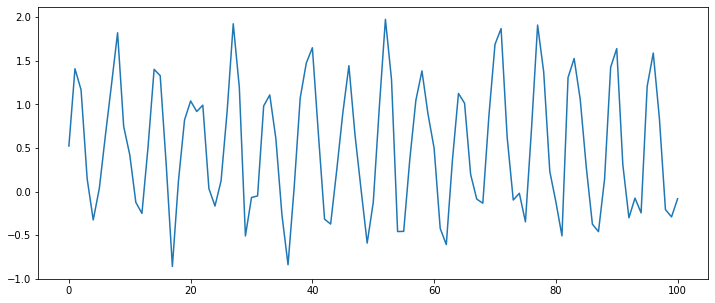

In [7]:
plt.figure(figsize=[12, 5])
plt.plot(x, y)

In [12]:
def weighted_average(y, beta):
    v = 0
    weighted_y = []
    for i in y:
        v = beta*v + (1-beta)*i
        weighted_y.append(v)
    return np.array(weighted_y)

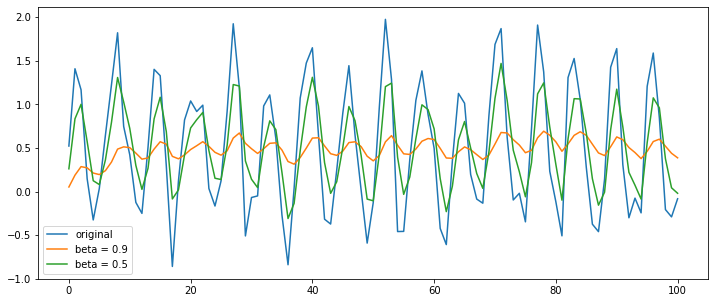

In [11]:
beta = .9
y_weighted1 = weighted_average(y, beta)
beta = .5
y_weighted2 = weighted_average(y, beta)

plt.figure(figsize=[12, 5])
plt.plot(x, y, label='original')
plt.plot(x, y_weighted1, label='beta = 0.9')
plt.plot(x, y_weighted2, label='beta = 0.5')
plt.legend()

We can see that the higher $\beta$ is, the smoother the line becomes. In fact, the average values roughly equals to

$$ \frac{1}{1-\beta}$$

Which means given $\beta = .9$, it roughly averages value of past 10 events.

## Momentum
---
The momentum in gradient descent borrow the idea of weighted average, the equations as shown as below:

$$v_{dW_t} = \beta v_{dW_{t-1}} + (1 - \beta)dW_{t}$$
$$v_{{db}_t} = \beta v_{{db}_{t-1}} + (1 - \beta)db_{t}$$

$$ W_t = W_t - \alpha v_{dW_t}$$
$$ b_t = b_t - \alpha v_{db_t}$$

Where $v_{0} = 0$, and the corresponding $v$ have the same shape as $dW$, $db$.

One problem in the raw gradient descent is that the oscillation involved in the optimization process. Taken from the $sin$ function above, you can see that the original function oscillates violently, while after weighted average added, the oscillation is smoothed out. The same intuition applies to gradient descent with momentum, in the high dimensional parameter space, oscillation to the irrelevant direction is smoothed out, and the downhill to the minimization is accelerated.

# RMSProp
---
It makes use of the squared weighted average of past gradients. 

$$S_{dW_t} = \beta S_{dW_{t-1}} + (1 - \beta)dW_{t}^2$$
$$S_{{db}_t} = \beta S_{{db}_{t-1}} + (1 - \beta)db_{t}^2$$

$$ W_t = W_t - \alpha \frac{dW_t}{\sqrt{S_{dW_t}} + \epsilon}$$

$$ b_t = b_t - \alpha \frac{db_t}{\sqrt{S_{{db}_t}} + \epsilon}$$

Where $S_t = 0$ and $\epsilon$ is a very small value to avoid divided by 0. An intuitive understanding of this is that as the squared value becomes large, the division would be small, as if a friction is added to the ball rolling downhill to control the speed, especially when it approximates the optimal value, as $S_t$ grows bigger and bigger, the steps taken around the optimal would be smaller and smaller so that it would be easier to reach optimal.

# Adam
---
So far the most powerful optimization method known combines the traits of both `RMSProp` and `Momentum`, which makes the update equations a little bit complex:

$$v_{dW_t} = \beta_1 v_{dW_{t-1}} + (1 - \beta_1)dW_{t}$$
$$v_{{db}_t} = \beta_1 v_{{db}_{t-1}} + (1 - \beta_1)db_{t}$$

$$S_{dW_t} = \beta_2 S_{dW_{t-1}} + (1 - \beta_2)dW_{t}²$$
$$S_{{db}_t} = \beta_2 S_{{db}_{t-1}} + (1 - \beta_2)db_{t}²$$

$$v_{dW_t}^{corrected} = \frac{v_{dW_t}}{(1 - \beta_1^t)}$$
$$v_{db_t}^{corrected} = \frac{v_{{db}_t}}{(1 - \beta_1^t)}$$

$$ W_t = W_t - \alpha \frac{v_{dW_t}^{corrected}}{\sqrt{S_{dW_t}} + \epsilon}$$
$$ b_t = b_t - \alpha \frac{v_{db_t}^{corrected}}{\sqrt{S_{{db}_t}} + \epsilon}$$

Based on `RMSProp`, the numerator $dW, db$ is substituted with corrected momentum. Here the correction process mainly takes effect at the initial phase: when $\beta^t$ is large (note that $\beta$ is less than 1), the corresponding value would be augmented, otherwise it would be very small at the beginning phase.
In the implementation process, take note that both $S$ and $V$ would share the same shape with either $W$ or $b$. 

And all the methods introduced here are efficient at memory usage because, at each step $t$, only the value of $V_t$ and $S_t$ are stored, no other intermediate values required.